In [52]:
import os
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from itertools import product
import xgboost as xgb

In [53]:
dataset_path = '/Users/mtaglio/www/amq2_tp/data/transformed/train_transformed.csv'  
df_dataset = pd.read_csv(dataset_path)

X = df_dataset.drop(columns=['Item_Outlet_Sales'])  
y = df_dataset['Item_Outlet_Sales']

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Create a list of all possible combinations of hyperparameters
param_combinations = list(product(*param_grid.values()))

# Create a directory for saving models and results
if not os.path.exists('models'):
    os.makedirs('models')

# Perform grid search
for i, params in enumerate(param_combinations, start=1):
    # Create a directory for each model run
    model_dir = f'/Users/mtaglio/www/amq2_tp/models/model_{i}'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # Set hyperparameters
    hyperparameters = dict(zip(param_grid.keys(), params))

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = xgb.XGBRegressor(**hyperparameters)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    train_r2 = r2_score(y_train, y_pred_train)
    val_r2 = r2_score(y_val, y_pred_val)

    # Save model and summary
    with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
        pickle.dump(model, f)

    summary = {
        'hyperparameters': hyperparameters,
        'metrics': {
            'train_rmse': train_rmse,
            'val_rmse': val_rmse,
            'train_r2': train_r2,
            'val_r2': val_r2
        }
    }
    with open(os.path.join(model_dir, 'summary.pkl'), 'wb') as f:
        pickle.dump(summary, f)

/Users/mtaglio/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/mtaglio/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/mtaglio/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/mtaglio/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lea

In [54]:
import os
import pandas as pd

models_dir = '/Users/mtaglio/www/amq2_tp/models/'

hyperparameters_list = []
folder_name_list = []
max_depth_list = []
learning_rate_list = []
n_estimators_list = []
train_rmse_list = []
val_rmse_list = []
train_r2_list = []
val_r2_list = []

for folder_name in os.listdir(models_dir):
    folder_path = os.path.join(models_dir, folder_name)
    
    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        summary_path = os.path.join(folder_path, 'summary.pkl')
        with open(summary_path, 'rb') as f:
            summary = pickle.load(f)
        
        hyperparameters = summary['hyperparameters']
        metrics = summary['metrics']
        
        # Extract individual hyperparameters
        max_depth = hyperparameters['max_depth']
        learning_rate = hyperparameters['learning_rate']
        n_estimators = hyperparameters['n_estimators']
        
        # Extract individual metrics
        train_rmse = metrics['train_rmse']
        val_rmse = metrics['val_rmse']
        train_r2 = metrics['train_r2']
        val_r2 = metrics['val_r2']
        
        folder_name_list.append(folder_name)
        hyperparameters_list.append(hyperparameters)
        max_depth_list.append(max_depth)
        learning_rate_list.append(learning_rate)
        n_estimators_list.append(n_estimators)
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

data = {
    'folder_name': folder_name_list,
    'max_depth': max_depth_list,
    'learning_rate': learning_rate_list,
    'n_estimators': n_estimators_list,
    'train_rmse': train_rmse_list,
    'val_rmse': val_rmse_list,
    'train_r2': train_r2_list,
    'val_r2': val_r2_list
}

df = pd.DataFrame(data)

df.head(2)

   folder_name  max_depth  learning_rate  n_estimators   train_rmse  \
0      model_3          3           0.01           200  1190.964642   
1      model_4          3           0.10            50  1118.608877   
2      model_5          3           0.10           100  1118.608877   
3      model_2          3           0.01           100  1491.554324   
4     model_16          6           0.20            50  1075.297437   
5     model_11          6           0.01           100  1457.404058   
6     model_18          6           0.20           200  1075.297437   
7     model_27          9           0.20           200   970.952449   
8     model_20          9           0.01           100  1432.960698   
9     model_21          9           0.01           200  1083.828955   
10    model_19          9           0.01            50  1906.297799   
11    model_26          9           0.20           100   970.952449   
12    model_10          6           0.01            50  1912.982642   
13    

In [79]:
def plot(field, size_field):
    df.groupby(field).val_r2.max().plot(label="val r2", color="r")
    plt.scatter(df[field], df.val_r2, c="r", alpha=0.5, s=df[size_field])

    df.groupby(field).train_r2.max().plot(label="tain r2", color="b")
    plt.scatter(df[field], df.train_r2, c="b", alpha=0.5, s=df[size_field])

    plt.xlabel(field)
    plt.ylabel("r2")
    plt.grid()

In [82]:
#Define overfitting metric 
df["overfitting"] = df["train_r2"] / df["val_r2"]
df.sort_values("val_r2", ascending=False)

,folder_name,max_depth,learning_rate,n_estimators,train_rmse,val_rmse,train_r2,val_r2,overfitting
1,model_4,3,0.10,50,1118.608877,1045.672332,0.576990,0.597703,0.965345
2,model_5,3,0.10,100,1118.608877,1045.672332,0.576990,0.597703,0.965345
17,model_6,3,0.10,200,1118.608877,1045.672332,0.576990,0.597703,0.965345
18,model_8,3,0.20,100,1116.027292,1045.708887,0.578940,0.597675,0.968653
15,model_7,3,0.20,50,1116.027292,1045.708887,0.578940,0.597675,0.968653
14,model_9,3,0.20,200,1116.027292,1045.708887,0.578940,0.597675,0.968653
26,model_13,6,0.10,50,1057.193865,1047.054786,0.622164,0.596639,1.042781
25,model_14,6,0.10,100,1057.193865,1047.054786,0.622164,0.596639,1.042781
20,model_15,6,0.10,200,1057.193865,1047.054786,0.622164,0.596639,1.042781
13,model_17,6,0.20,100,1075.297437,1050.621622,0.609113,0.593886,1.025639


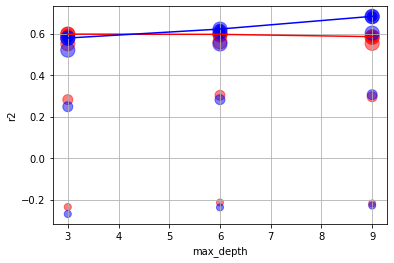

In [80]:
plot("max_depth", "n_estimators")

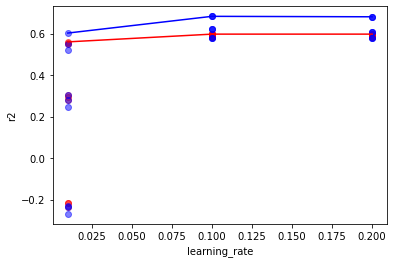

In [74]:
plot("learning_rate")

Text(0, 0.5, 'r2')

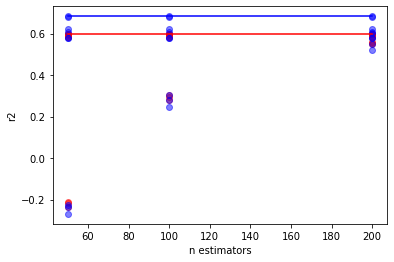

In [70]:
df.groupby("n_estimators").val_r2.max().plot(label="val r2", color="r")
plt.scatter(df.n_estimators, df.val_r2, c="r", alpha=0.5)

df.groupby("n_estimators").train_r2.max().plot(label="tain r2", color="b")
plt.scatter(df.n_estimators, df.train_r2, c="b", alpha=0.5)

plt.xlabel("n estimators")
plt.ylabel("r2")

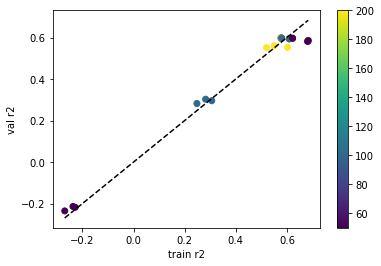

In [65]:
def plot_

plt.scatter(df.train_r2, df.val_r2, c=df.n_estimators)
m = min(df.train_r2.min(), df.val_r2.min())
M = max(df.train_r2.max(), df.val_r2.max())
plt.plot([m, M], [m, M], "k--")
plt.xlabel("train r2")
plt.ylabel("val r2")
plt.colorbar()

In [55]:
df.head(2)

,folder_name,max_depth,learning_rate,n_estimators,train_rmse,val_rmse,train_r2,val_r2
0,model_3,3,0.01,200,1190.964642,1104.108223,0.520496,0.551483
1,model_4,3,0.10,50,1118.608877,1045.672332,0.576990,0.597703


In [56]:
min_index = df["val_r2"].idxmax()
print(min_index)
min_row = df.loc[min_index]
print(min_row)

1
folder_name          model_4
max_depth                  3
learning_rate            0.1
n_estimators              50
train_rmse       1118.608877
val_rmse         1045.672332
train_r2             0.57699
val_r2              0.597703
Name: 1, dtype: object
